In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Dataset

In [2]:
#trainデータ,testデータ,sampleデータの読み込み
train = pd.read_csv('../datasets/train.tsv',delimiter='\t')
test = pd.read_csv('../datasets/test.tsv',delimiter='\t')
sample=pd.read_csv('../datasets/sample_submit.csv',header=None)

In [3]:
train.head()

,id,Y,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,f,y,n,f,f,f,c,n,...,k,w,w,p,w,o,e,w,v,d
1,2,p,f,y,y,f,f,f,c,b,...,k,b,p,p,w,o,l,h,y,g
2,3,e,b,y,w,t,l,f,c,b,...,s,w,w,p,w,o,p,k,n,m
3,5,p,x,s,b,t,f,f,c,b,...,s,w,w,p,w,o,p,h,v,u
4,7,p,x,s,w,t,f,f,c,b,...,f,w,w,p,w,o,p,h,v,g


In [4]:
train.shape

(4062, 24)

## create missing value data

In [5]:
# create NaN data
num_nan = 10
missing_x = np.random.randint(0, train.shape[0], (num_nan, 1))
missing_y = np.random.randint(0, train.shape[1], (num_nan, 1))

for i, j in zip(missing_x, missing_y):
    train.iloc[i, j] = np.nan

In [6]:
train.dtypes

id                           int64
Y                           object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

## Handling Missing Values

In [7]:
train[train.isnull().any(axis=1)]

,id,Y,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
72,132,e,NaN,f,n,t,n,f,c,b,...,s,g,g,p,w,o,p,n,v,d
78,149,e,x,f,NaN,f,n,f,w,b,...,f,w,w,p,w,o,e,n,s,g
206,407,p,f,s,g,t,f,f,c,b,...,s,w,w,p,w,o,p,h,s,NaN
725,1447,e,f,f,e,t,n,f,c,b,...,s,g,p,p,w,o,p,n,v,d
746,1502,e,x,s,NaN,f,n,f,w,b,...,s,w,w,p,w,o,e,k,a,g
1014,2028,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,s,m
1093,2186,p,x,s,b,t,f,f,c,b,...,f,w,w,p,w,o,p,h,NaN,u
1109,2221,p,x,f,g,f,f,f,c,b,...,k,p,n,p,w,o,l,h,v,g
2579,5170,e,b,y,w,t,l,f,NaN,b,...,s,w,w,p,w,o,p,k,s,m
3736,7468,e,x,s,y,t,a,f,NaN,n,...,s,w,w,p,w,o,p,u,v,d


In [8]:
train.dropna(inplace=True)
train.shape

(4052, 24)

In [9]:
X=train.iloc[:,2:]
y=train['Y']

## One-Hot encoding

In [10]:
X=pd.get_dummies(X)

In [11]:
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


## EDA

In [12]:
X.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,...,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.00000,4052.000000
mean,0.059724,0.000740,0.387710,0.104393,0.002468,0.444965,0.275173,0.000740,0.316387,0.407700,...,0.156466,0.493830,0.208045,0.384748,0.260612,0.100444,0.037266,0.143386,0.04689,0.026654
std,0.237003,0.027203,0.487288,0.305807,0.049623,0.497023,0.446656,0.027203,0.465123,0.491467,...,0.363341,0.500024,0.405960,0.486596,0.439023,0.300628,0.189435,0.350509,0.21143,0.161088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [13]:
print(X.shape)

(4052, 117)


In [14]:
print(y.shape)

(4052,)


## Class ratio

In [15]:
from collections import Counter
print(Counter(y))

Counter({'e': 2096, 'p': 1956})


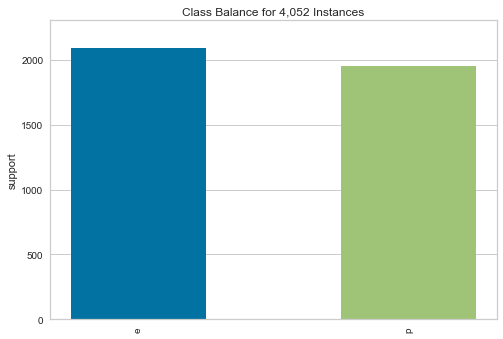

In [16]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()
visualizer.fit(y)
plt.xticks(rotation=90)
visualizer.poof()

## Correlation

/anaconda3/lib/python3.7/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[None, :]
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


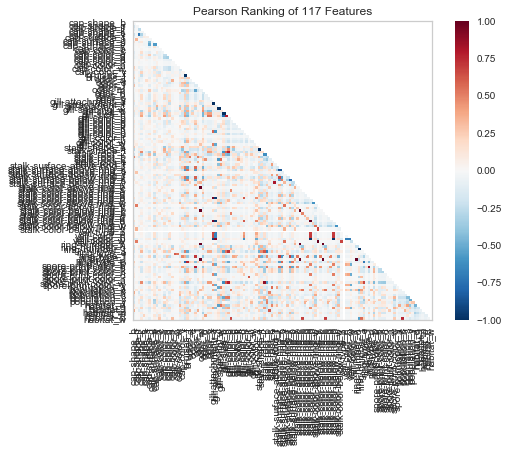

In [17]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(features=X.columns, algorithm='pearson')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

## Box plot

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]),
 <a list of 117 Text xticklabel objects>)

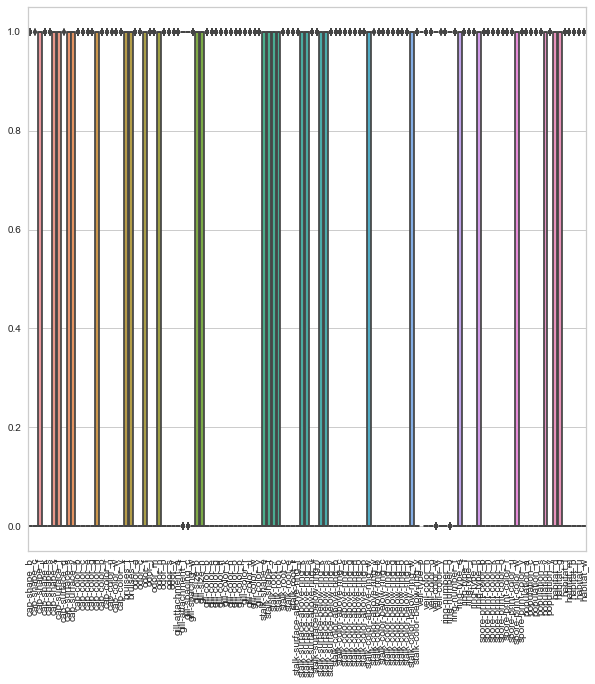

In [18]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)

## Learning

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [20]:
X = np.array(X)
y = np.array(y)

# scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    shuffle=True, random_state=42)

In [22]:
# learning
kernel = ['linear', 'rbf', 'poly']
clf_SVM = []

for i in kernel:
    svm = SVC(C=1.0, gamma='auto', kernel=i, random_state=42)
    clf_SVM.append(svm.fit(X_train, y_train))

## Evaluate

In [23]:
from sklearn import metrics

In [24]:
def calc_metrics(y_test, y_pred):
    pre = metrics.precision_score(y_test, y_pred, average='micro')
    recall = metrics.recall_score(y_test, y_pred, average='micro')
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='micro')
    metrics_list = [pre, recall, acc, f1]
    
    return metrics_list

In [25]:
result = []

for i in range(len(clf_SVM)):
    y_pred = clf_SVM[i].predict(X_test)
    result.append(calc_metrics(y_test, y_pred))

In [26]:
result_df = pd.DataFrame(result, columns=['Precision', 'Recall', 'Acc', 'F-score'])
result_df = result_df.assign(Kernel=kernel)
result_df = result_df[['Kernel', 'Precision', 'Recall', 'Acc', 'F-score']]
round(result_df, 3)

,Kernel,Precision,Recall,Acc,F-score
0,linear,1.000,1.000,1.000,1.000
1,rbf,0.998,0.998,0.998,0.998
2,poly,1.000,1.000,1.000,1.000


In [27]:
result_mlt = pd.melt(result_df, id_vars='Kernel', var_name='Metrics', value_name='values')
result_mlt

,Kernel,Metrics,values
0,linear,Precision,1.000000
1,rbf,Precision,0.997532
2,poly,Precision,1.000000
3,linear,Recall,1.000000
4,rbf,Recall,0.997532
5,poly,Recall,1.000000
6,linear,Acc,1.000000
7,rbf,Acc,0.997532
8,poly,Acc,1.000000
9,linear,F-score,1.000000


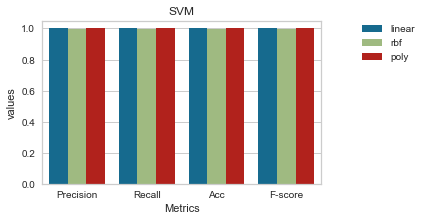

In [28]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Metrics', y='values', hue='Kernel', data=result_mlt)
plt.title('SVM')
plt.legend(loc='best', bbox_to_anchor=(1.35, 1), borderaxespad=0)

## Grid Search

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
tuning_parm = [
    {'C': [0.01,0.1,1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [100,10,1,0.1,0.001, 0.0001]},
    {'C': [0.01,0.1,1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [100,10,1,0.1,0.001, 0.0001]}
]

clf_SVM = GridSearchCV(SVC(), tuning_parm, cv=5, scoring='f1_micro', return_train_score=True)

In [ ]:
clf_SVM.fit(X_train,y_train)

In [ ]:
grid_df = pd.DataFrame.from_dict(clf_SVM.cv_results_)
grid_df.head()

In [ ]:
col = ['mean_train_score', 'params']
grid_df = grid_df[col]
grid_df.sort_values(by=['mean_train_score'], ascending=False)

In [ ]:
clf_SVM.best_params_

In [ ]:
clf_SVM.best_estimator_

In [ ]:
clf_SVM=SVC(C=1000,kernel='poly',degree=4,gamma=0.001)
clf_SVM.fit(X_train, y_train)

In [ ]:
# predict label
y_pred = clf_SVM.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

In [ ]:
test.head()

In [ ]:
Xts=test.iloc[:,1:]
Xts=pd.get_dummies(Xts)

In [ ]:
y_pred=clf_SVM.predict(Xts)
sample[1]=y_pred
sample.to_csv("../submit/poison_submit_1.csv", header = None, index = None)

## Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
tuned_parameters = [
    {'C': [0.001,0.01,0.1,1, 10, 100, 1000]}
    ]

In [ ]:
score = 'f1'
clf_LR = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5)

In [ ]:
clf_LR.fit(X_train, y_train) 

In [ ]:
grid_df = pd.DataFrame.from_dict(clf_LR.cv_results_)
grid_df.head()

In [ ]:
clf_LR.best_params_

In [ ]:
clf_LR.best_estimator_

In [ ]:
# learning
clf_LR = LogisticRegression(penalty='l2', C=0.01)
clf_LR.fit(X_train, y_train)
y_pred = clf_LR.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

In [ ]:
y_pred=clf_LR.predict(Xts)
sample[1]=y_pred
sample.to_csv("../submit/poison_submit_2.csv", header = None, index = None)

## K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
list_nn = []
list_score = []

In [ ]:
for k in range(1,20):
    knc=KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train,y_train)
    
    y_pred=knc.predict(X_test)
    
    score=knc.score(X_test,y_test)
    print("[%d]score:{:.2f}".format(score)%k)
    
    list_nn.append(k)
    list_score.append(score)

In [ ]:
plt.plot(list_nn, list_score)

In [ ]:
y_pred=knc.predict(Xts)
sample[1]=y_pred
sample.to_csv("../submit/poison_submit_3.csv", header = None, index = None)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_DT=DecisionTreeClassifier(max_depth=3)
clf_DT=clf_DT.fit(X_train,y_train)

y_pred=clf_DT.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

In [ ]:
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

In [ ]:
clf_tree = DecisionTreeClassifier(max_depth = 3)
clf_tree = clf_tree.fit(X,y)

dot = StringIO()
export_graphviz(clf_tree, out_file = dot)
graph = pydotplus.graph_from_dot_data(dot.getvalue())
graph.write_pdf("../graph/graph.pdf")